In [1]:
import os

path = os.path.expanduser('~/Desktop/corkit_examples')

In [2]:
from lasco import downloader
from datetime import datetime

#Give a tuple with datetime values, doesn't expect resolutions higher than days.
interval_time = [(
    datetime(2003, 10, 25),
    datetime(2003, 10, 30)
) ]

lasco_down = downloader('c3', root = path) #C2 coronagraph

await lasco_down(interval_time)

/usr/lib/python3/dist-packages/paramiko/transport.py:237: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [3]:
sorted(list(filter(lambda x: '20031028' in x, os.listdir(os.path.join(path, 'c2')))))

['20031028_000606.fits',
 '20031028_003005.fits',
 '20031028_005405.fits',
 '20031028_013145.fits',
 '20031028_015405.fits',
 '20031028_020605.fits',
 '20031028_023006.fits',
 '20031028_025405.fits',
 '20031028_030605.fits',
 '20031028_033005.fits',
 '20031028_035405.fits',
 '20031028_040605.fits',
 '20031028_043005.fits',
 '20031028_045405.fits',
 '20031028_050605.fits',
 '20031028_053005.fits',
 '20031028_055405.fits',
 '20031028_060605.fits',
 '20031028_063005.fits',
 '20031028_065405.fits',
 '20031028_073143.fits',
 '20031028_075405.fits',
 '20031028_080605.fits',
 '20031028_083005.fits',
 '20031028_085405.fits',
 '20031028_090605.fits',
 '20031028_093005.fits',
 '20031028_095405.fits',
 '20031028_100606.fits',
 '20031028_103021.fits',
 '20031028_105405.fits',
 '20031028_110605.fits',
 '20031028_113005.fits',
 '20031028_115405.fits',
 '20031028_120607.fits',
 '20031028_123005.fits',
 '20031028_125405.fits',
 '20031028_133157.fits',
 '20031028_135546.fits',
 '20031028_140749.fits',


Importing data
LASCO-C2:22157677.fts:2003/10/28T12:54:05.521...


[Text(0.5, 1.0, 'SolarSoft')]

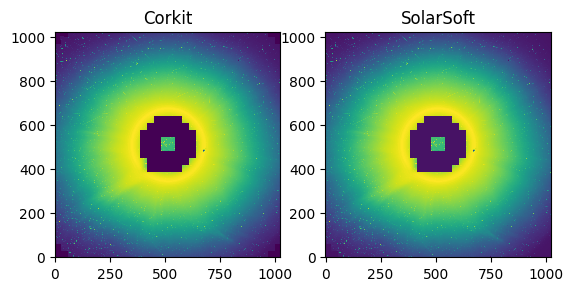

In [4]:
import matplotlib.pyplot as plt
import matplotlib
import copy
import numpy as np
from astropy.visualization import HistEqStretch, ImageNormalize
from lasco import reduce_level_1
from utils import FITS
import os
#official level 1
img1, header1 = FITS('25157677.fits')
file = os.path.join(path, 'c2', '20031028_125405.fits')
#our level 1
img, header = reduce_level_1(
    file, 
    os.path.join(path, 'prueba.fits')
)

def prepare_img(img):
    finite_data = img[np.isfinite(img)]
    norm = ImageNormalize(stretch=HistEqStretch(finite_data))
    return norm

norm = prepare_img(img)
norm1 = prepare_img(img1)

#ploot
fig, ax = plt.subplots(1, 2)
cmap = copy.copy(matplotlib.colormaps['gray'])
cmap.set_bad(color='red')

ax[0].imshow(img.T, norm=norm, interpolation = 'nearest', origin = 'lower')
ax[0].set(title = 'Corkit')
ax[1].imshow(img1, norm=norm1, interpolation = 'nearest', origin = 'lower')
ax[1].set(title = 'SolarSoft')